<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/6/6f/Dauphine_logo_2019_-_Bleu.png" style="width: 600px;"/> 
</center>  

<div align="center"><span style="font-family:Arial Black;font-size:33px;color:darkblue"> Master Economie Finance </span></div>


<div align="center"><span style="font-family:Arial Black;font-size:27px;color:darkblue">Application Lab – Gradient Descent</span></div>

<div align="center"><span style="font-family:Arial Black;font-size:20px;color:darkblue">Logistic Regression Model
</span></div>

# Gradient Descent

Gradient descent is a numerical minimization algorithm for a function.

It is used when there is no analytical solution available (or when it is not easily computable).

 **Parameters:**
 - Let $ f : x \longmapsto f(x) $ be a function to minimize.
 - Let $ \beta_0 \in \mathbb{R} $ be a starting point for the algorithm (its initialization at $ t = 0 $).
 - Let $ \epsilon > 0 $ (small) be a tolerance threshold for the optimization error (example: $ \epsilon = 10^{-8} $ ).
 - Let $ c \in \mathbb{R}^{+*} $ be a step size and $ t $ the number of iterations already performed: $ \gamma_t = \frac{c}{\sqrt t} $ .
 - $ K_{max} \in \mathbb{N} $ is an integer defining the maximum number of iterations of the algorithm.

The algorithm is as follows:

For $ t = 0 $ up to $ K_{max} $:
 - 1: Compute the gradient of the function $ f $, $ \nabla(f) : \beta_t \longmapsto \nabla f(\beta_t) $
 - 2: If $ ||\nabla f(\beta_t)|| < \epsilon $:
   - stop the algorithm and $ \beta_t $ is taken as the minimum of the function.
 - Otherwise:
   - Set $ \beta_{t+1} = \beta_t - \gamma_t \nabla f(\beta_t) $
 - 3: Re-iterate starting from step 1.

Here we will work in $ \mathbb{R} $, so we have a one-dimensional problem, we choose:
$$ ||.|| : x \longmapsto |x| $$

---
# Log-Likelihood Maximization Exercise using Gradient Descent

## Logistic Regression Model

The logistic regression model is a regression model widely used for handling binary variables in statistics.

In a Machine Learning approach, this is referred to as a classification model.

**Objective :** Find the parameter $ \beta ^* $ that was used to simulate the $ Y_i $

***Logistic Model***:

$$ Y_i^* = \beta x_i + \epsilon _i  , \epsilon _i \sim \mathcal{L}$$
$$ Y_i = \left\{
    \begin{array}{ll}
        1 & \mbox{if }  Y_i^* > 0 \\
        0 & \mbox{otherwise.}
    \end{array}
\right. $$ 

The noise $ \epsilon_i $ follows a continuous logistic distribution $\mathcal{L}$ on $\mathbb{R}$ with density (symmetric with respect to 0) with respect to the Lebesgue measure:

$$ \forall x \in \mathbb{R} , f(x)= \frac{e^{-x}}{(1 + e^{-x})^2} $$

For $ i = 1, ..., n $ we observe the dependent variable $ Y $ and the explanatory variable $ (x_i)_{i=1}^n $, which we assume are drawn $(iid)$ from a standard normal distribution:

$$ \forall i, x_i \sim \mathcal{N}(0,1) $$

**NB: The observations \$ Y_i \$ are independent but not identically distributed.**

Likelihood of the observations:
$$ L(y_1,y_2,...,y_n,\beta) = \prod_{i=1}^{n} \mathbb{P}({Y_i = y_i})$$

Log-likelihood of the observations:

$$ l(y_1,y_2,...,y_n,\beta) = log(\prod_{i=1}^{n} \mathbb{P}({Y_i = y_i})) = \sum_{i=1}^{n} log(\mathbb{P}({Y_i = y_i})) $$

We will now denote $ l(\beta) $ instead of $ l(y_1, y_2, ..., y_n, \beta) $ since we treat the log-likelihood of the observations as a function of the parameter $ \beta $ and not as a function of the data in the maximum likelihood problem.

Log-likelihood to **maximize**:
$$ \forall \beta \in \mathbb{R} , l(\beta) = - \sum_{i=1}^{n} log(1+e^{-\beta x_i}) - \beta \sum_{i:Y_i = 0}x_i $$

Negative log-likelihood to **maximize**:

$$ \forall \beta \in \mathbb{R} , -l(\beta) = \beta \sum_{i:Y_i = 0}x_i + \sum_{i=1}^{n} log(1+e^{-\beta x_i}) $$

Gradient of the negative log-likelihood:

$$ \forall \beta \in \mathbb{R} , (-l(\beta))' = \sum_{i:Y_i = 0}x_i - \sum_{i=1}^{n} \frac{x_i e^{-\beta x_i}}{1 + e^{-\beta x_i}}$$

---
## Imports

In [32]:
from math import *
from random import *
import matplotlib.pyplot as plt 
import numpy as np
from tqdm import tqdm
from scipy.optimize import minimize
from typing import Callable
from numpy._typing import ArrayLike
from scipy.special import expit
np.random.seed(seed=1)

---
## Simulation

Set \$ n \$ as the number of random draws of \$ Y^\* \$ (start with 100 draws).

In [33]:
n = 100 # Sample size

Simulation of a standard normal distribution for the \$n\$-sample \$(x\_1, ... , x\_n)\$ in a variable named `x`.

In [34]:
x = np.random.normal(0,1,n)

Simulation of a logistic distribution for the \$n\$-sample \$(\epsilon\_1, ... , \epsilon\_n)\$ in a variable named `epsilon`.


In [35]:
epsilon = np.random.logistic(0,1,n)

Initialization of an arbitrary \$ \beta^\* \$ in a variable named `beta_star` (arbitrary).

In [36]:
beta_star = 1

Simulation of the variable \$ Y^\* \$ using \$ \epsilon \$ and \$ x \$ in a variable named `Y_star`.


In [37]:
Y_star = beta_star * x + epsilon

---
## Functions

Computation of the negative log-likelihood using a function named `f`.

In [38]:
def f(B : float, x_variable: ArrayLike, y_star_variable: ArrayLike) -> float :
    f_result = -np.sum(np.logaddexp(0,-B * x_variable)) - B * np.sum(x_variable[y_star_variable==0]) # same computation but more stable version for small inputs
    return -f_result

Computation of the gradient of the negative log-likelihood in a function named `grad_f`.

In [39]:
def grad_f(B : float, x_variable: ArrayLike, y_star_variable: ArrayLike) -> float :
    return np.sum(-x_variable * expit(-B * x_variable)) + np.sum(x_variable[y_star_variable == 0]) # same computation but more stable version for small inputs

Function to perform gradient descent by fixing its parameters:

* \$ \beta\_0 \in \mathbb{R} \$ the starting point for the algorithm (its initialization at \$ t = 0 \$).
* \$ \nabla (f) : \beta\_t \longmapsto \nabla f(\beta\_t) \$ the gradient.
* \$ K\_{max} \in \mathbb{N} \$ an integer defining the maximum number of iterations of the algorithm.
* \$ \epsilon > 0 \$ (small) a tolerance threshold for the optimization error (example: \$ \epsilon = 10^{-8} \$).
* \$ c \in \mathbb{R}^{+\*} \$ the step size used to compute: \$ \gamma\_t = \frac{c}{\sqrt{t}} \$.

*Name the function `gradient_descent_function` and remember to type the inputs and the output.*


In [40]:
def gradient_descent_function(B0 : float, x_variable: ArrayLike, y_star_variable: ArrayLike, df : Callable ,KMAX : int ,eps : float ,c : float) -> float:
    beta = B0
    for i in tqdm(range(1, KMAX+1)):
        if(np.abs(df(beta, x_variable, y_star_variable))>eps):
             beta -= (c/sqrt(i))*df(beta, x_variable, y_star_variable)
        else:
            break
    return beta

---

## Curve of the function to minimize


Plot the log-likelihood by simulating the inputs (with `np.linspace`) and the outputs (using the function `f` already coded above).

Use matplotlib for the graph (`matplotlib.pyplot.plot`).

Add a vertical line at \$ \beta^\* \$ to visually check whether the log-likelihood has a minimum and whether this minimum is indeed at \$ \beta^\* \$.


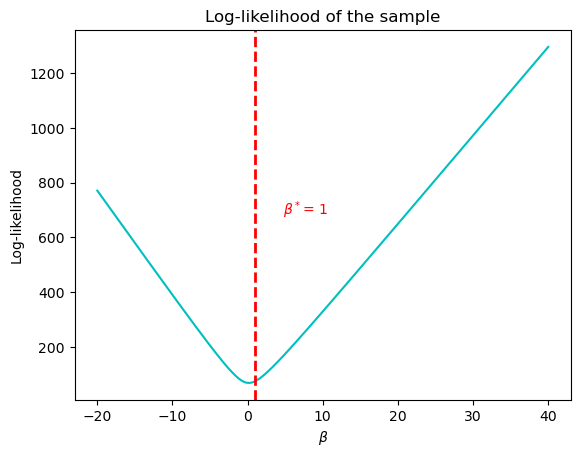

In [41]:
Beta_vector = np.linspace(-20,40, num=500)

vrais = [f(i, x, Y_star) for i in Beta_vector]
    
plt.plot(Beta_vector,vrais,
         color='c')
plt.axvline(beta_star, color='r', linestyle='dashed', linewidth=2)
plt.xlabel(r'$\beta$')
plt.ylabel('Log-likelihood')
plt.title('Log-likelihood of the sample')

min_xlim, max_xlim = plt.xlim()
min_ylim, max_ylim = plt.ylim()
plt.text(min_xlim+ 0.42*(max_xlim-min_xlim),min_ylim + 0.5*(max_ylim-min_ylim), r'$\beta^*$'+'= {}'.format(beta_star), color='r')
plt.show()

---

## Search for the optimal \$ \beta \$ with different step sizes


Perform gradient descent for several different step sizes \$ c \$:
\$ \[0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2, 3, 10] \$

Store the values found in a list named `l`.

In [42]:
C = [0.001,0.01,0.1,0.5,1,2,3,10]
l = [gradient_descent_function(0,x, Y_star, grad_f, 10000,10**(-8),c) for c in C]

100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 76672.43it/s]


Using a simple loop over the list `l`, display the following sentence for each value of \$ c \$:

* `"With c=... : beta = ..."`


In [43]:
C = [0.001,0.01,0.1,0.5,1,2,3,10]
for i,beta in enumerate(l) :
    print(f'With c={C[i]}, beta = {beta}')

With c=0.001, beta = 0.15140813171238518
With c=0.01, beta = 0.15464659664440406
With c=0.1, beta = 0.15464659749701956
With c=0.5, beta = 0.15464659674777856
With c=1, beta = 0.15464659675320078
With c=2, beta = 0.15464659764306915
With c=3, beta = 0.15464659668108272
With c=10, beta = 0.1546465983709209


"What do we observe? What is the contribution of tqdm?"


---

## Verification of our results with a function from the `scipy.optimize` package


Minimize the function `f` (negative log-likelihood) using the `minimize` function from the `scipy` package and compare with the results obtained by gradient descent.


In [44]:
mymin = minimize(f, 0, args= (x, Y_star), method='nelder-mead')
print(f'beta optimal : {mymin["x"][0]}')

beta optimal : 0.15462500000000012


Using the `minimize` function from `scipy`, we can check the relevance of our gradient descent algorithm. Looking at the \$\beta\$ values obtained when the algorithm was used with appropriate \$c\$, we can see that the values match up to \$10^{-4}\$.


## Test of log-likelihood function minimization with random starting points


Draw \$1000\$ random \$ \beta\_0 \$ from a uniform distribution \$ U\[-100, 100] \$ and minimize (with `scipy.optimize.minimize`) the function \$ f \$ for all sampled \$ \beta\_0 \$.

Then, create a histogram (`matplotlib.pyplot.hist`) of the distribution of the solutions found for each \$ \beta\_0 \$, and add a vertical line at the mean.

In [45]:
unif_sample_estimation = list()
for Beta_0 in np.random.uniform(-100,100,1000):
    unif_sample_estimation.append(minimize(f, Beta_0, args= (x, Y_star), method='nelder-mead')["x"][0])

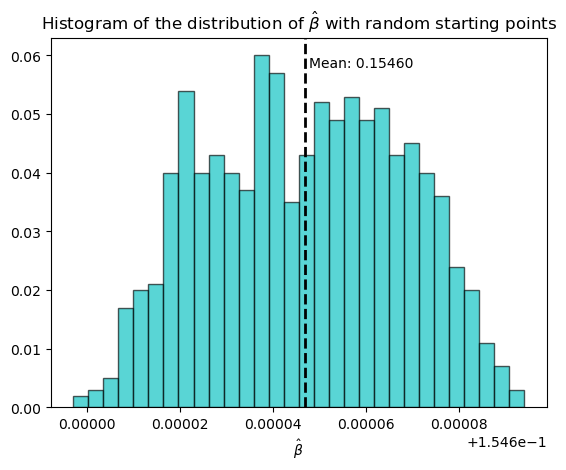

In [46]:
plt.hist(unif_sample_estimation,
         bins=30,
         color='c',
         edgecolor='k',
         alpha=0.65,
         weights=np.ones_like(unif_sample_estimation) / len(unif_sample_estimation))
plt.axvline(np.mean(unif_sample_estimation), color='k', linestyle='dashed', linewidth=2)
plt.xlabel(r'$\hat\beta$')
plt.title('Histogram of the distribution of '+r'$\hat\beta$'+' with random starting points')
min_xlim, max_xlim = plt.xlim()
min_ylim, max_ylim = plt.ylim()
plt.text(min_xlim+ 0.52*(max_xlim-min_xlim),min_ylim + 0.92*(max_ylim-min_ylim), 'Mean: {:.5f}'.format(round(np.mean(unif_sample_estimation),4)))
plt.show()